In [1]:
import numpy as np
import pandas as pd 
import pylab as pl
from matplotlib import pyplot as plt #画图
from sklearn.cluster import KMeans 
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import pandas_datareader as datareader
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ohlc
# from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

reading data from reading_scroll_features table and some data cleaning 

In [2]:
data = pd.read_csv('dataa/reading_scroll_features.csv')
data = data[data['relative_time'] < 2000]



(7600,)
(7600,)
(7600, 2)


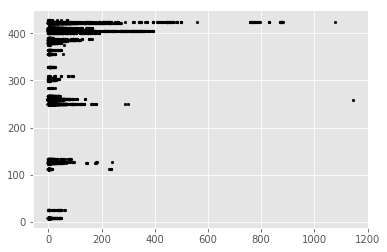

In [3]:
f1 = data['relative_time'].values
print(f1.shape)
f2= data['user_id'].values
print(f2.shape)
x = np.array(list(zip(f1,f2)))
print(x.shape)
plt.scatter(f1,f2, c='black', s=7)
#filter data 1.filtered() 2.sql 



In [4]:
# for index, row in data.iterrows():
#     if row['offset_difference'] < 0:
#         temp = row['max_offset']
#         row['max_offset'] = row['min_offset']
#        row['min_offset'] = temp
#         print(row['max_offset'],row['min_offset'],row['offset_difference'])
#         np.append([row['max_offset'],row['min_offset'],row['offset_difference']],a)
#     if row['offset_difference'] > 0:
#         np.append([row['max_offset'],row['min_offset'],row['offset_difference']],a)
#         print(row['max_offset'],row['min_offset'],row['offset_difference'])



display reading style by users

In [5]:
pd.options.display.max_rows = 1000
filtered_data =  data[(data['user_id'] == 409)]
filtered_data


#if wish to see data of sepectif reading behavior of specific article 
# filtered_data_article  =filtered_data[(filtered_data['article_id'] == 30118783)]
# filtered_data_article




,user_id,reading_session,article_id,scroll_range,max_offset,min_offset,offset_difference,relative_time,reading_duration,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
5435,409,4361e0e2-052a-495f-86a2-c93e7eccc23c,44005013,11756,154,6,148,0,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5436,409,4361e0e2-052a-495f-86a2-c93e7eccc23c,44005013,11756,260,0,260,1,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5437,409,4361e0e2-052a-495f-86a2-c93e7eccc23c,44005013,11756,793,273,520,2,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5438,409,4361e0e2-052a-495f-86a2-c93e7eccc23c,44005013,11756,1286,844,442,3,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5439,409,4361e0e2-052a-495f-86a2-c93e7eccc23c,44005013,11756,1468,1288,180,4,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5440,409,4361e0e2-052a-495f-86a2-c93e7eccc23c,44005013,11756,1623,1480,143,5,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5441,409,4361e0e2-052a-495f-86a2-c93e7eccc23c,44005013,11756,1698,1626,72,8,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5442,409,4361e0e2-052a-495f-86a2-c93e7eccc23c,44005013,11756,1750,1701,49,9,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5443,409,4361e0e2-052a-495f-86a2-c93e7eccc23c,44005013,11756,1819,1758,61,10,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5444,409,4361e0e2-052a-495f-86a2-c93e7eccc23c,44005013,11756,1921,1820,101,11,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
filtered_data1 = filtered_data[(filtered_data['article_id'] ==44005013 )]
filtered_data2 = filtered_data[(filtered_data['article_id'] ==44027773 )]
filtered_data3 = filtered_data[(filtered_data['article_id'] ==44047113 )]
filtered_data4 = filtered_data[(filtered_data['article_id'] ==44039616 )]
filtered_data5 = filtered_data[(filtered_data['article_id'] ==44038086 )]
filtered_data6 = filtered_data[(filtered_data['article_id'] ==44058190 )]
filtered_data7 = filtered_data[(filtered_data['article_id'] ==44051779 )]
filtered_data8 = filtered_data[(filtered_data['article_id'] ==44052070 )]
filtered_data9 = filtered_data[(filtered_data['article_id'] ==44055362 )]
filtered_data10 = filtered_data[(filtered_data['article_id'] ==44044248 )]
filtered_data11 = filtered_data[(filtered_data['article_id'] ==31589202 )]
filtered_data12 = filtered_data[(filtered_data['article_id'] ==31586980 )]
filtered_data13 = filtered_data[(filtered_data['article_id'] ==31582399 )]
filtered_data14 = filtered_data[(filtered_data['article_id'] ==31585149 )]
filtered_data15 = filtered_data[(filtered_data['article_id'] ==31587621 )]
filtered_data16 = filtered_data[(filtered_data['article_id'] ==31582826 )]
filtered_data17 = filtered_data[(filtered_data['article_id'] ==31730542 )]
filtered_data18 = filtered_data[(filtered_data['article_id'] ==31831857 )]
filtered_data19 = filtered_data[(filtered_data['article_id'] ==31832392 )]
filtered_data20 = filtered_data[(filtered_data['article_id'] ==31835198 )]




# | 31956026        |
# | 32091020        |
# | 32083181        |
# | 32082660        |
# | 32157686        |
# + --------------- +

([<matplotlib.lines.Line2D at 0x1a230ad588>,
  <matplotlib.patches.Rectangle at 0x1a23153828>])

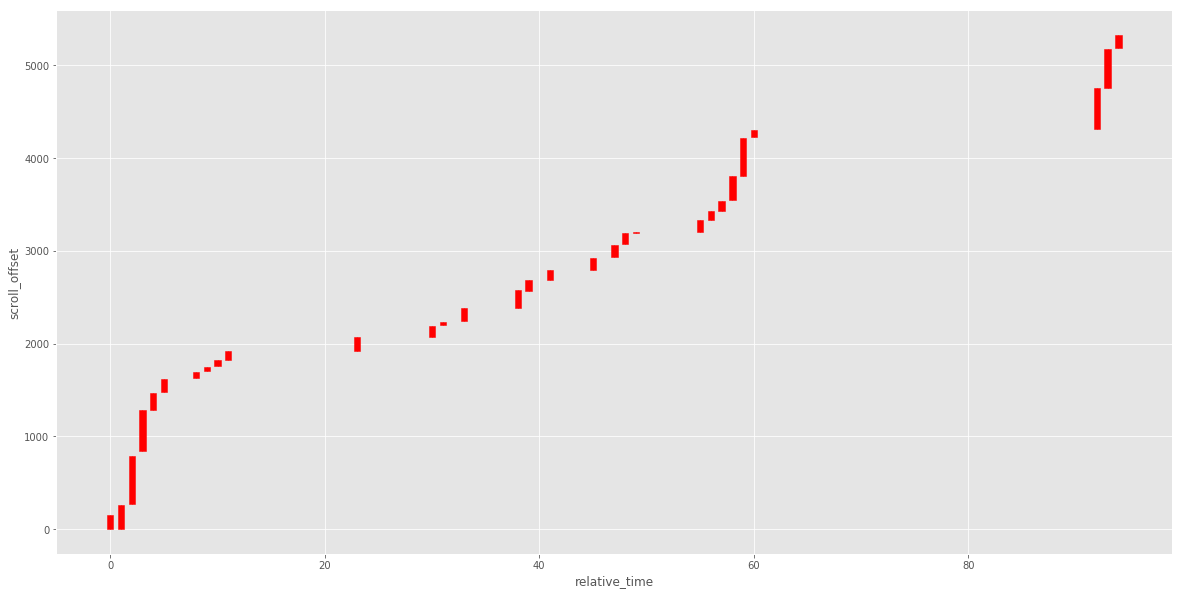

In [7]:
#for i in filtered_data: 
  #  if filtered_data['offset_difference'] > 0:
  ##      ohlc= filtered_data[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()
 #   else:
#        ohlc= filtered_data[['relative_time',  'min_offset','min_offset','max_offset', 'max_offset']].copy()
        
ohlc= filtered_data1[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')




([<matplotlib.lines.Line2D at 0x1a248f60f0>,
  <matplotlib.patches.Rectangle at 0x1a24945780>])

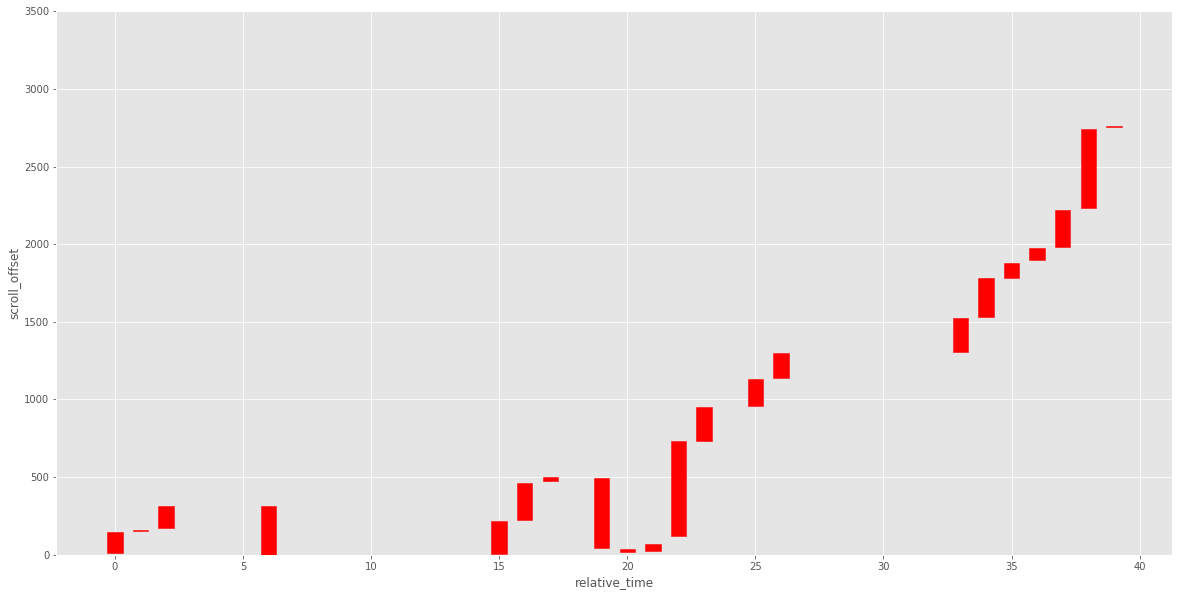

In [16]:
ohlc= filtered_data2[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()
f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
ax.set_ylim(0,3500)
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a17d5a7f0>,
  <matplotlib.patches.Rectangle at 0x1a1808e160>])

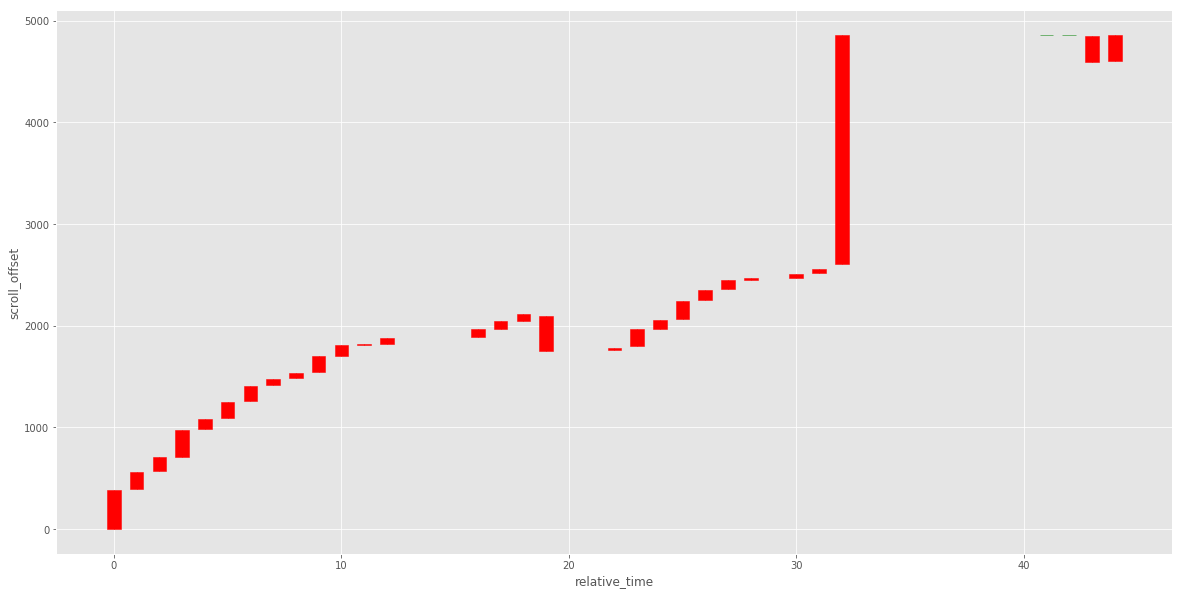

In [11]:
ohlc= filtered_data3[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a183aa438>,
  <matplotlib.patches.Rectangle at 0x1a18422d68>])

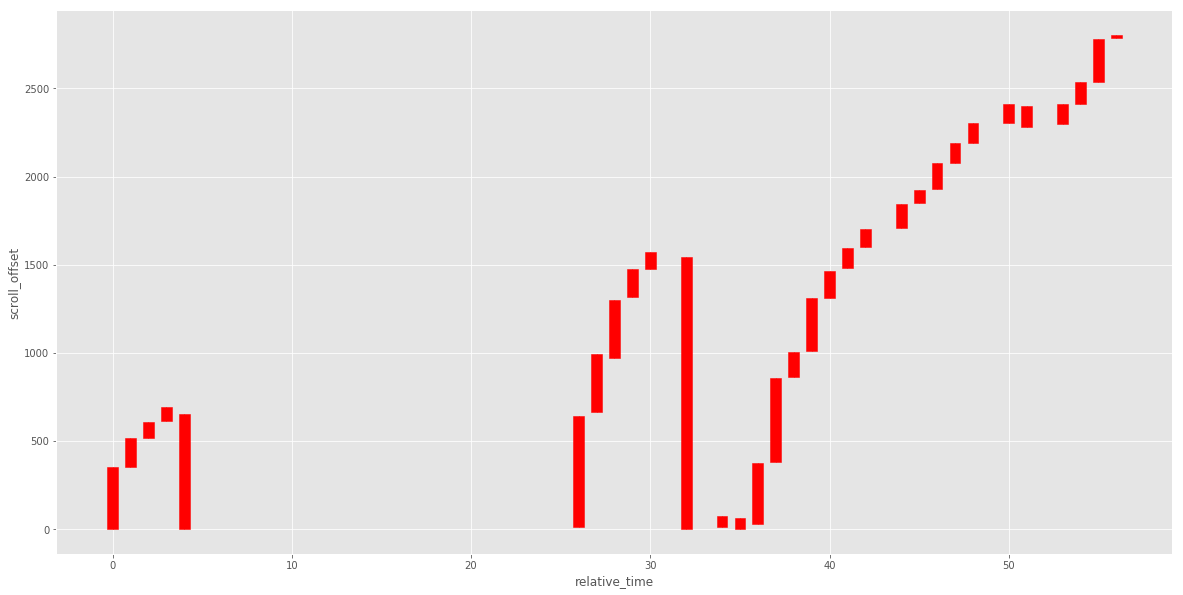

In [12]:
ohlc= filtered_data4[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')






([<matplotlib.lines.Line2D at 0x1a1849a630>,
  <matplotlib.patches.Rectangle at 0x1a187f4f60>])

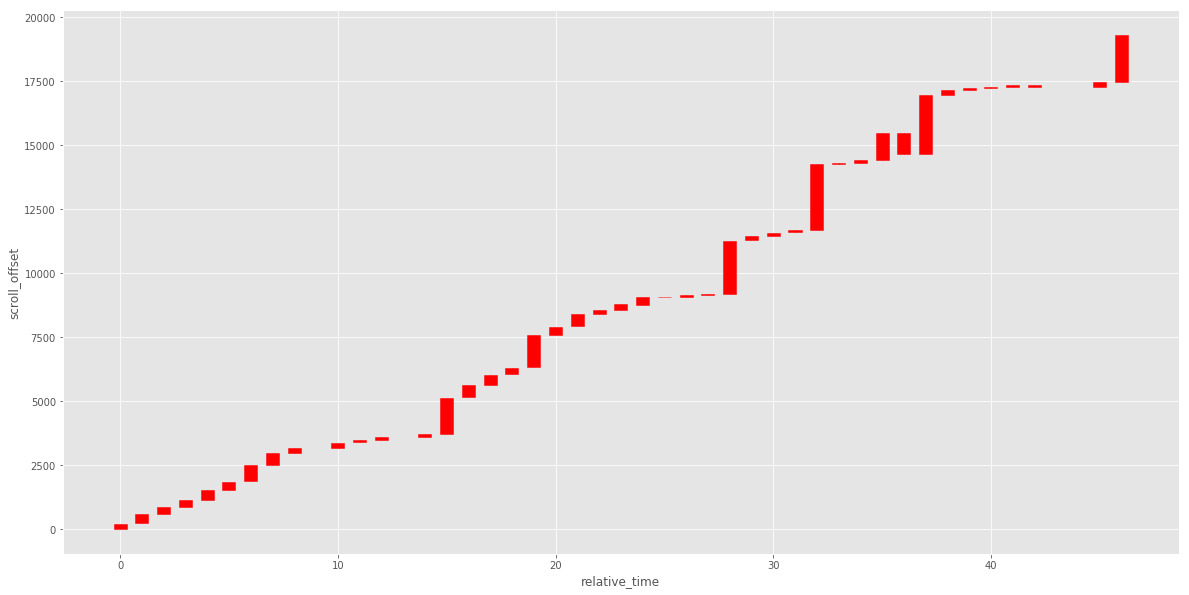

In [13]:
ohlc= filtered_data5[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a18875908>,
  <matplotlib.patches.Rectangle at 0x1a18b66128>])

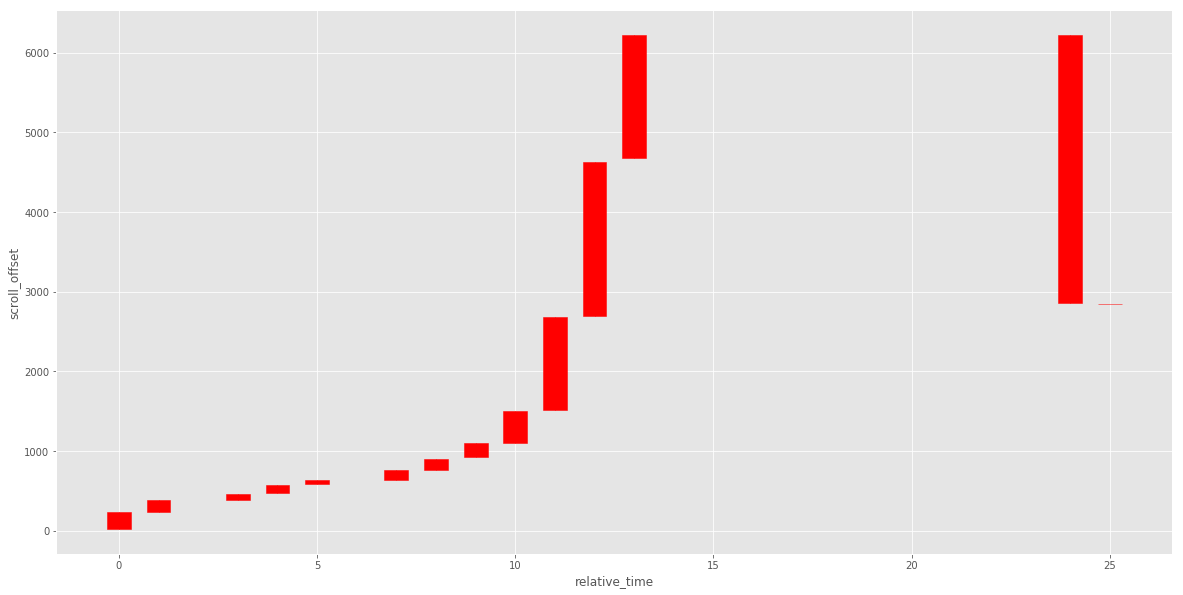

In [14]:
ohlc= filtered_data6[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a18e7c7b8>,
  <matplotlib.patches.Rectangle at 0x1a18ea3ba8>])

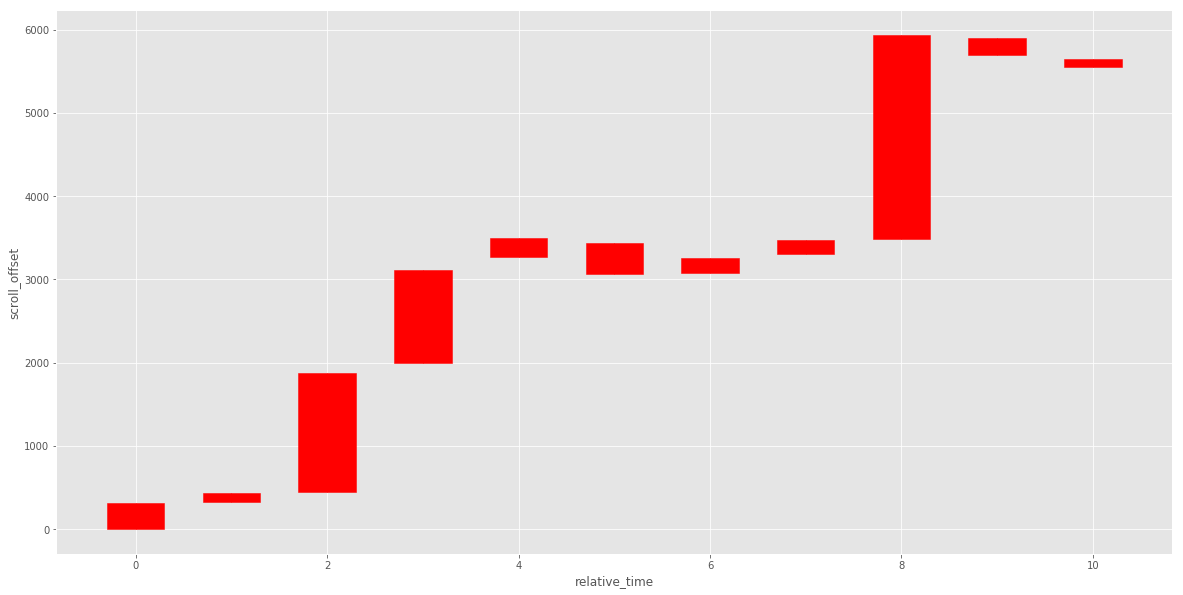

In [15]:
ohlc= filtered_data7[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a18f1a080>,
  <matplotlib.patches.Rectangle at 0x1a18f2d9b0>])

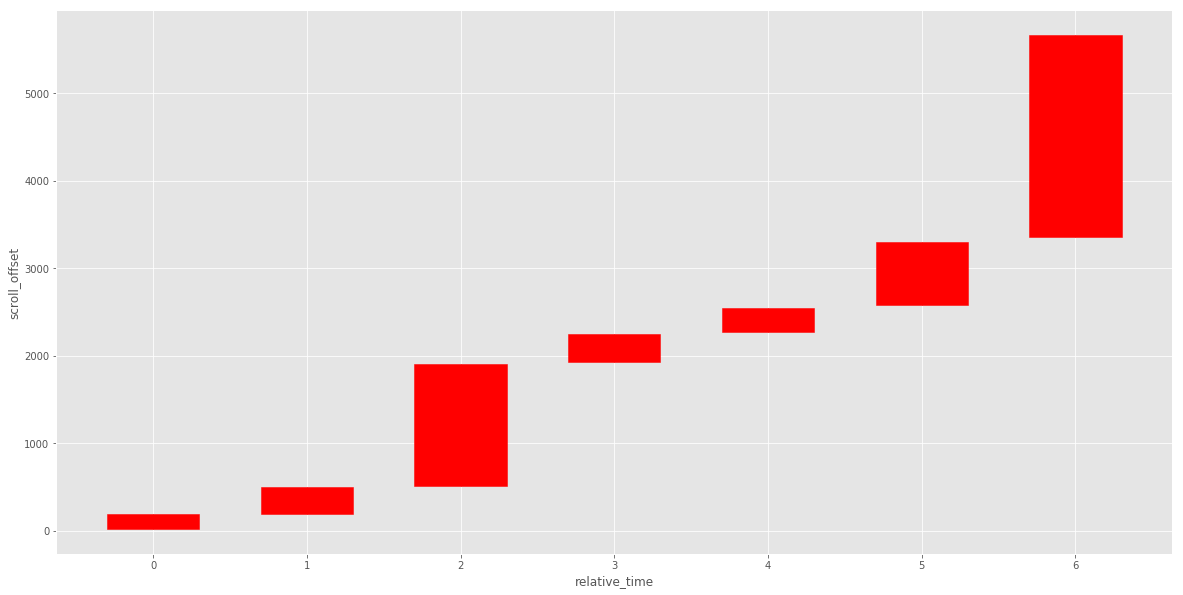

In [16]:
ohlc= filtered_data8[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a19245be0>,
  <matplotlib.patches.Rectangle at 0x1a19576be0>])

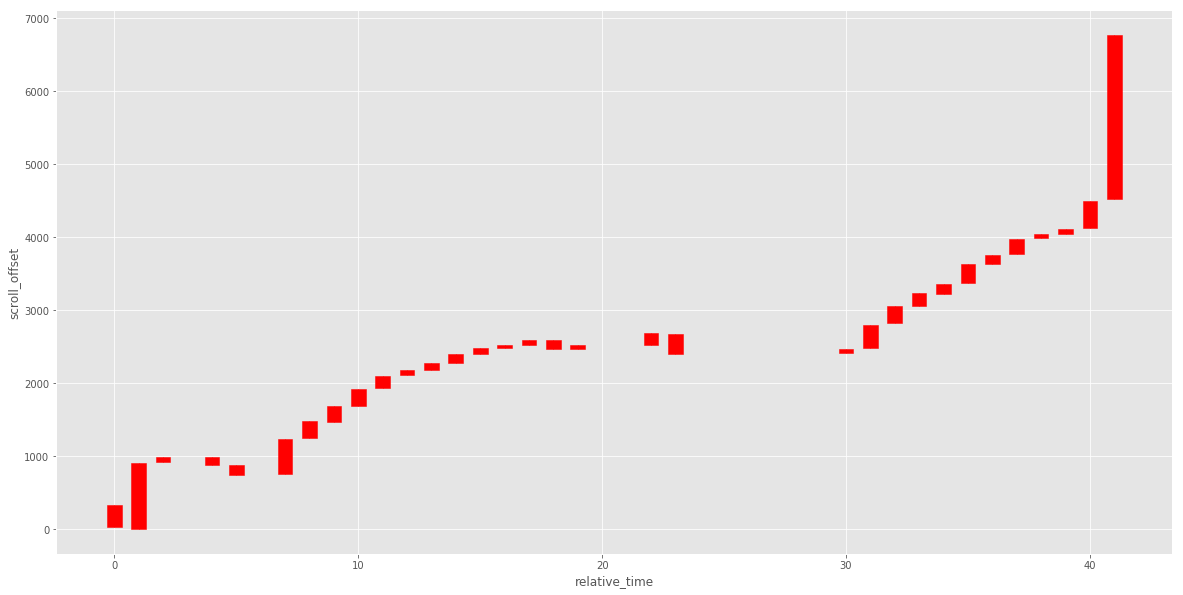

In [17]:
ohlc= filtered_data9[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a195ebb00>,
  <matplotlib.patches.Rectangle at 0x1a198e3da0>])

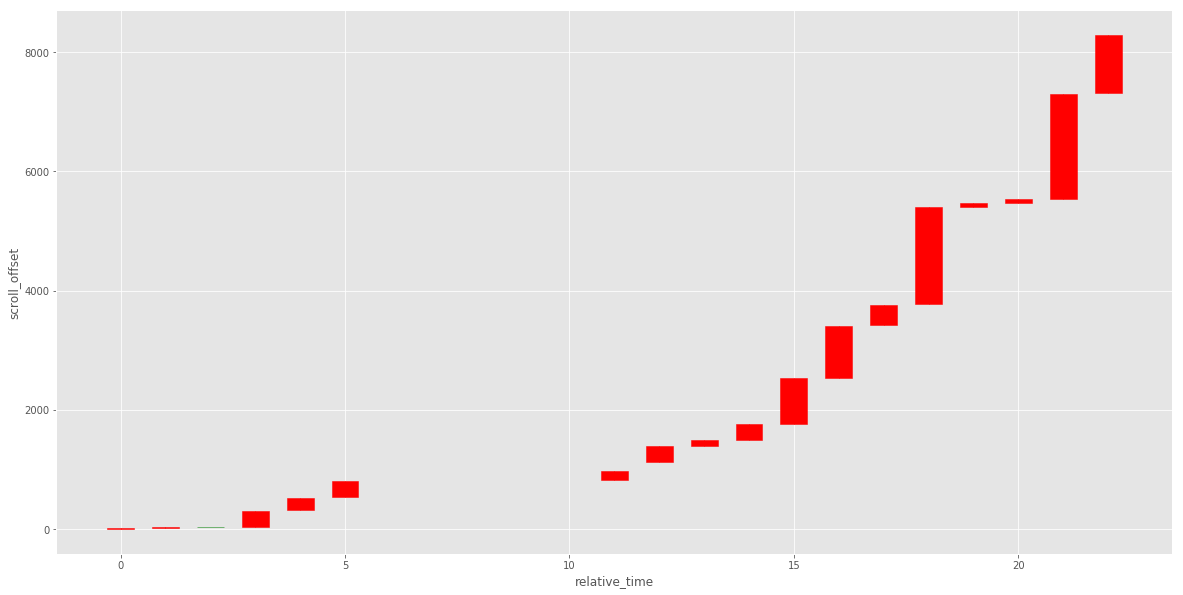

In [18]:
ohlc= filtered_data10[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([], [])

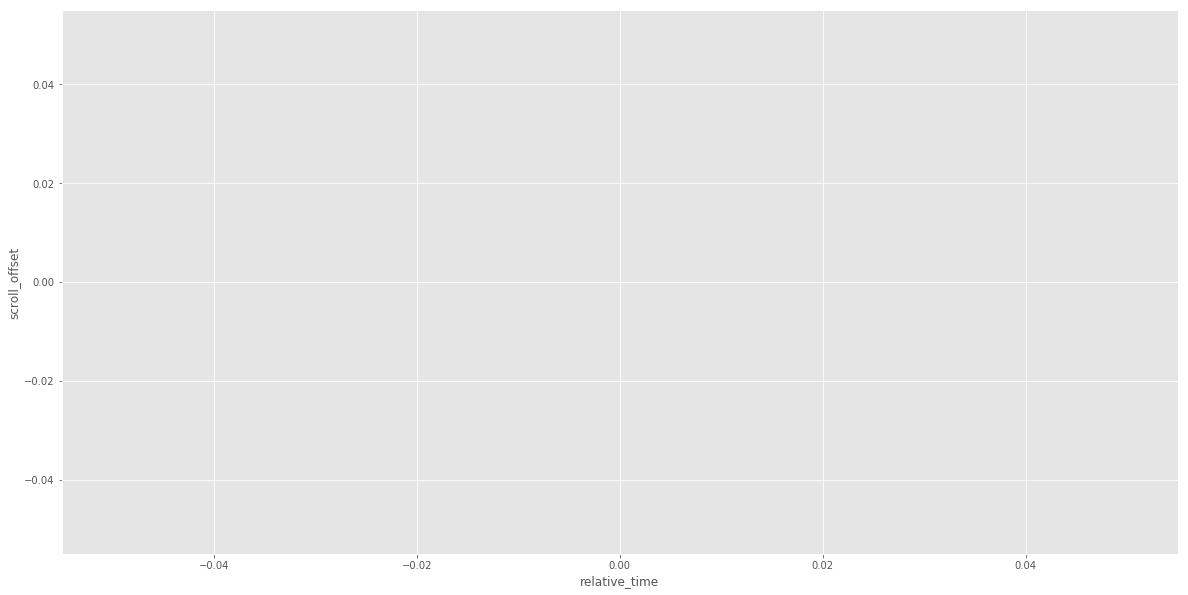

In [19]:
ohlc= filtered_data11[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')






([], [])

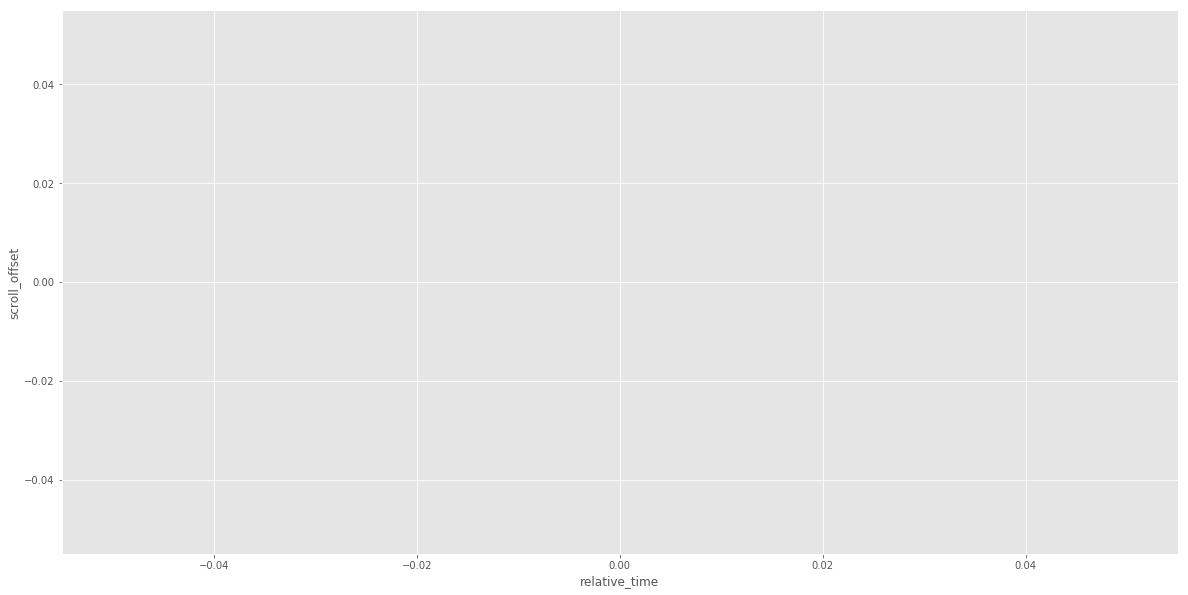

In [20]:
ohlc= filtered_data12[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







([], [])

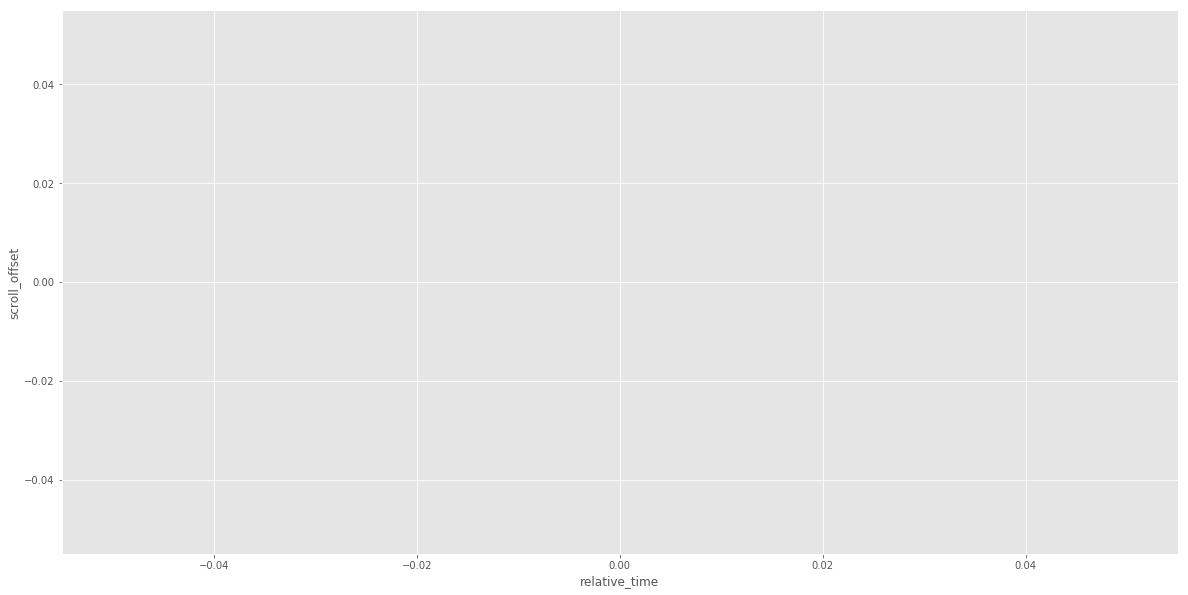

In [21]:
ohlc= filtered_data13[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







([], [])

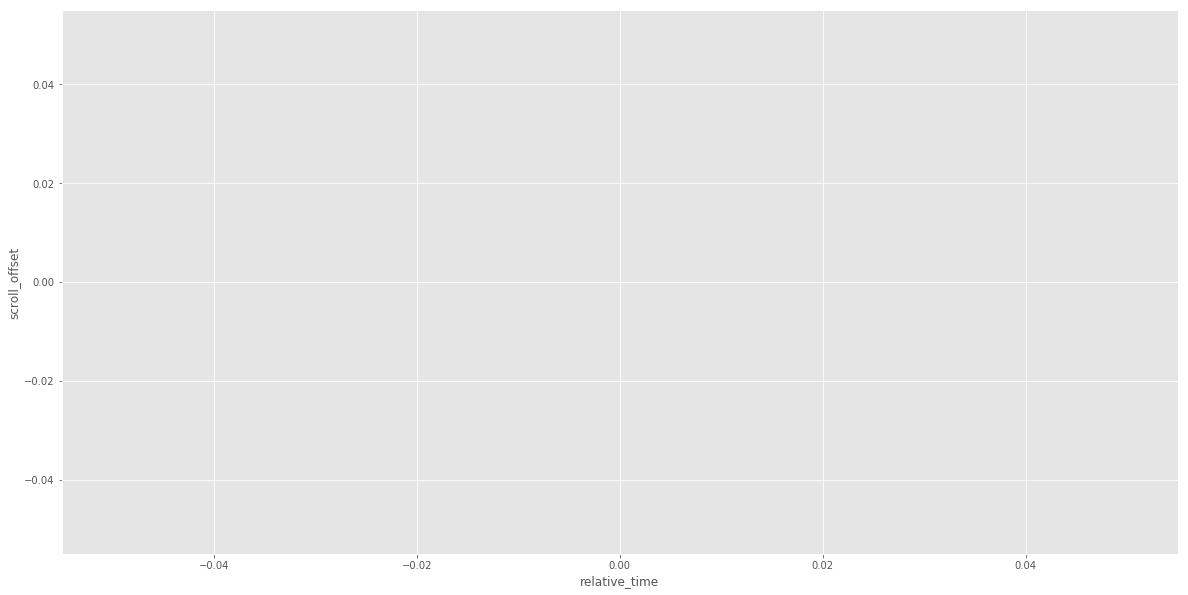

In [22]:
ohlc= filtered_data14[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







([], [])

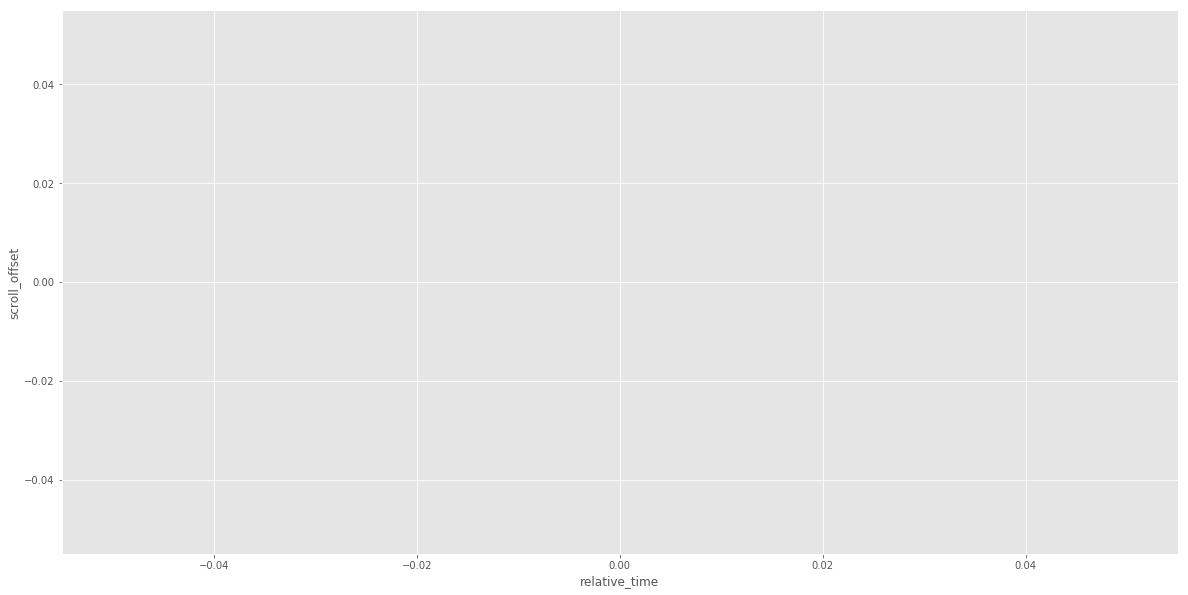

In [23]:
ohlc= filtered_data15[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







([], [])

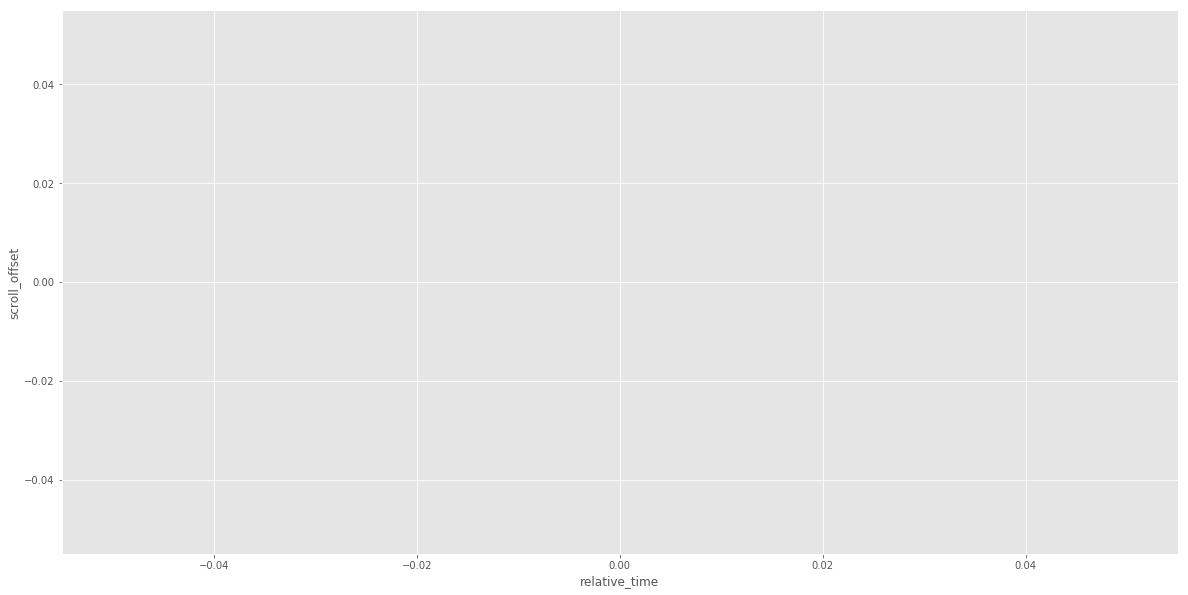

In [24]:
ohlc= filtered_data16[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







([], [])

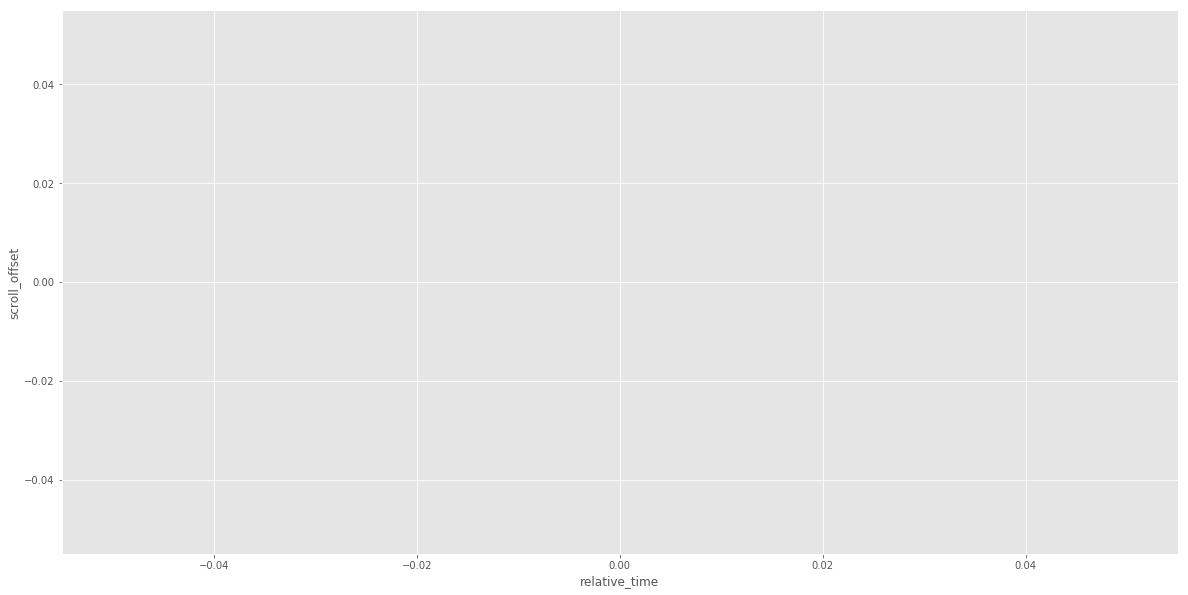

In [25]:
ohlc= filtered_data17[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







([], [])

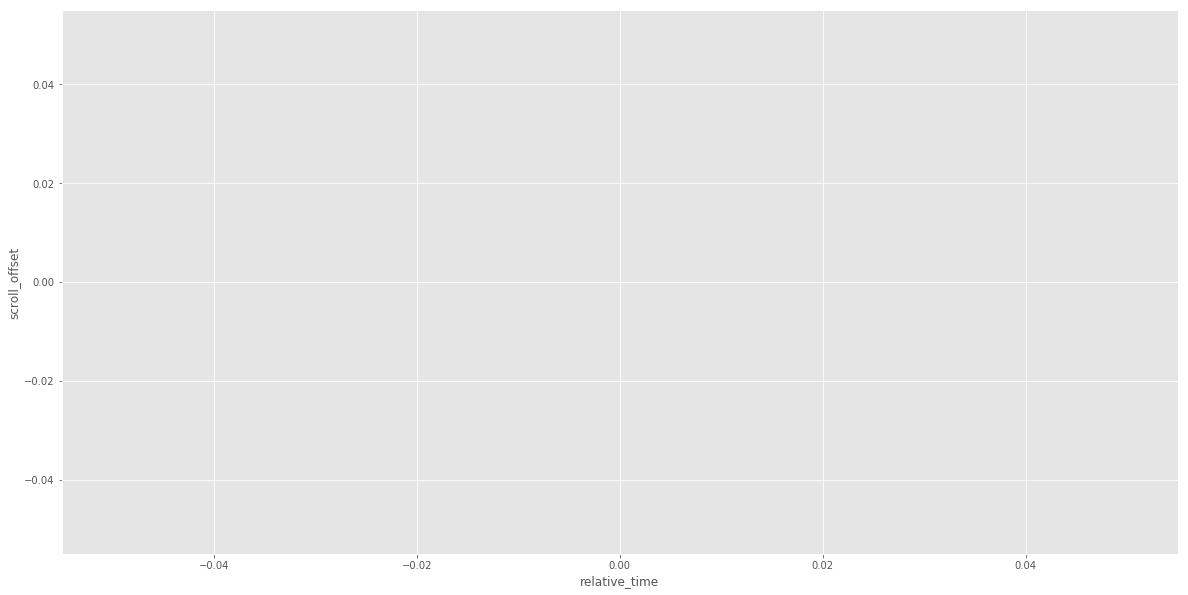

In [26]:
ohlc= filtered_data18[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







([], [])

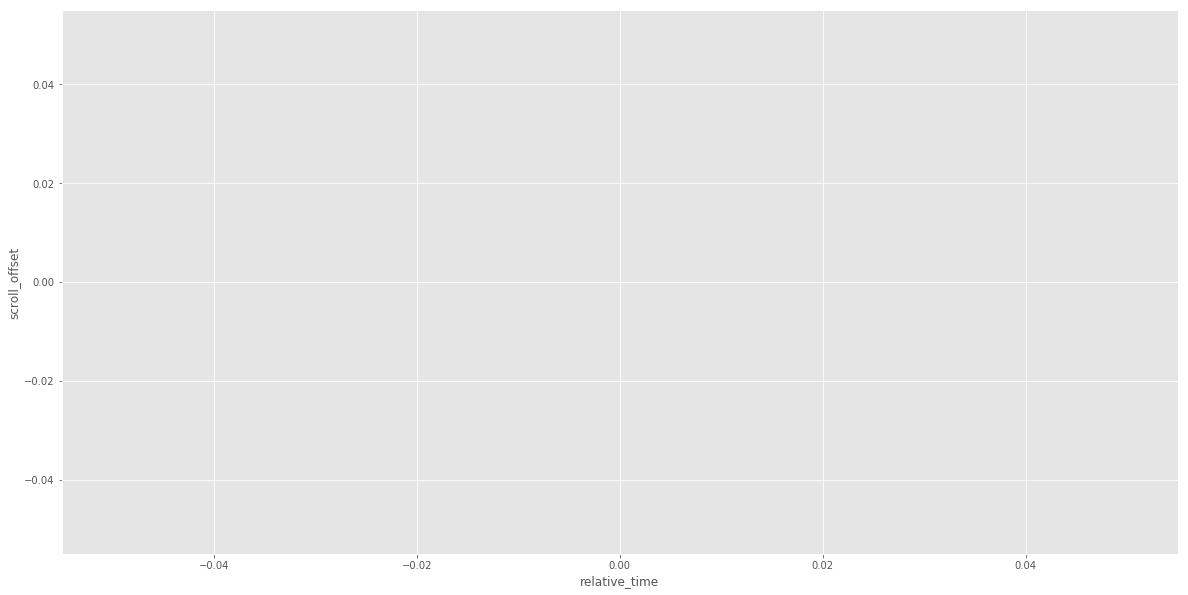

In [27]:
ohlc= filtered_data19[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







([], [])

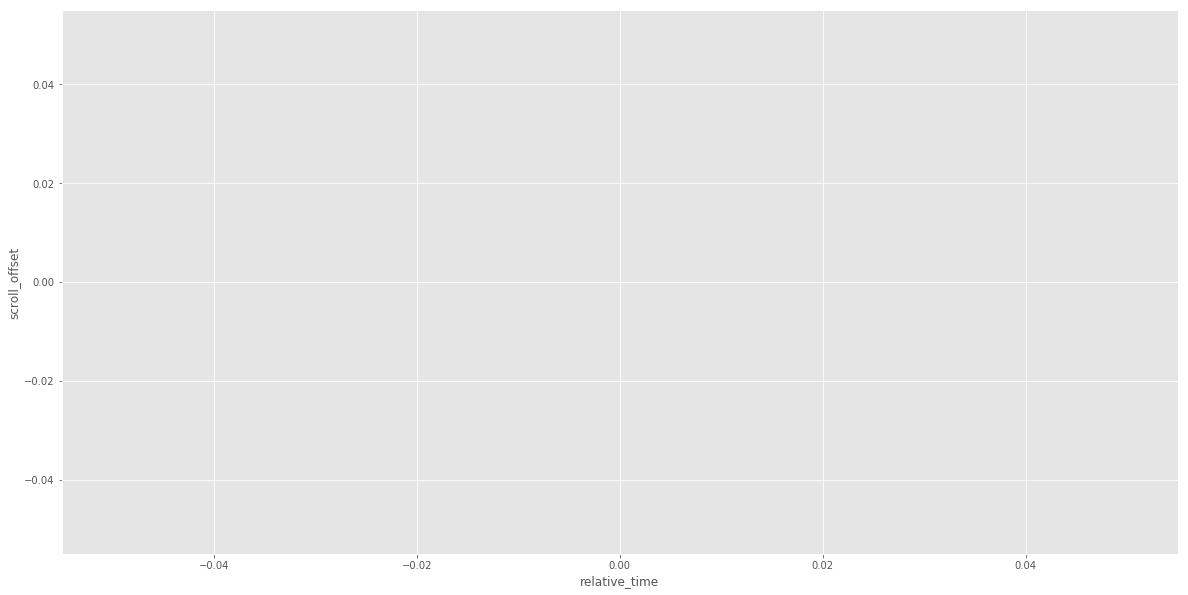

In [28]:
ohlc= filtered_data20[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





